## Demographic Change in Danish Kommuner
There is increasing awareness of the recent increase of foreign nationals making Denmark their home, particularly in cities like Copenhagen, but what is the picture in the rest of the country?

Looking at just the headline figure: (16% nationally), could flatten local patterns and concentrating on the entire population potentially means that the ageing population masks interesting trends. 
Since the restrictions from COVID-19 were lifted, migration has altered.

We will take a look at the nuances of this picture. Since 2021: 

- In which kommuner is the population decreasing, increasing and staying the same?

- In which kommuner are working age foreign nationals replacing the loss of working age Danes?
    - Are there kommuner where the population is increasing due to the arrival of working age foreign nationals?
    - Are there kommuner where working age Danes are leaving and not being replaced by foreign nationals?


---
Assumptions and Data Selection:-
- Working age: 18-66 years
- Time period 2025 Q3 (most recent data)
- Time period 2021 Q3 (comparing seasonal like-with-like, immediately after the pandemic)

---
[*Fair og Fornuftig 2025*](https://www.fairogfornuftig.dk/)
<br>

[![CC BY-NC-SA 4.0](https://licensebuttons.net/l/by-nc-sa/4.0/88x31.png)](https://creativecommons.org/licenses/by-nc-sa/4.0/)
<br>
This work is licensed under a [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License](https://creativecommons.org/licenses/by-nc-sa/4.0/).



In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, SymLogNorm
from matplotlib.colors import TwoSlopeNorm
import matplotlib.patches as mpatches


## Population Change Since 2021
We can see that the general trend is for people to move from the edges of the country into the bigger cities. There are some smaller kommuner that are bucking the trend.

<function matplotlib.pyplot.show(close=None, block=None)>

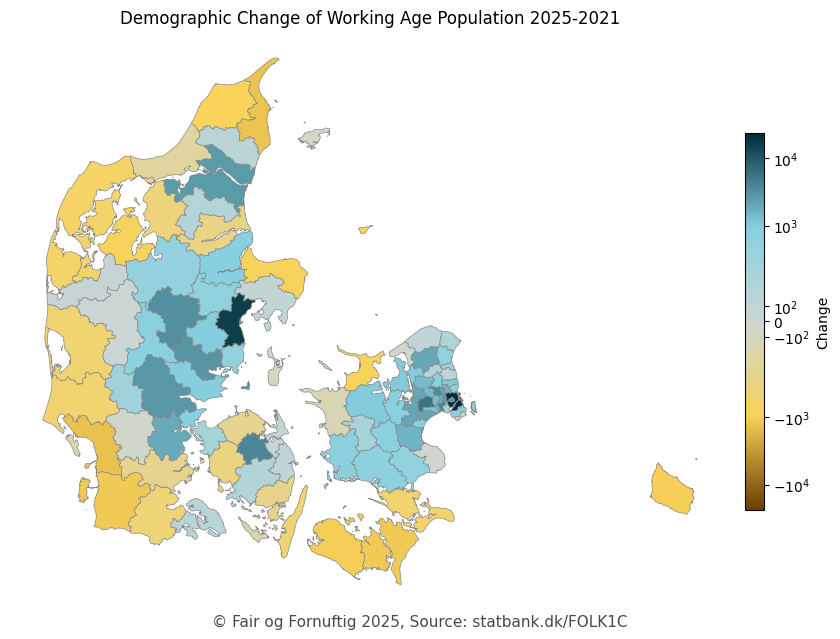

In [2]:

def build_colormap():
    #colour blind friendly
    colors = [
        (0.0,  "#6B3F02"),  # orangey brown (large loss)
        (0.25, "#F9D35A"),  # light yellow
        (0.5,  "#CCD6D3"),  # white at zero
        (0.75, "#86D0E0"),  # light blue
        (1.0,  "#002C39"),  # dark blue (large gain)
    ]
    return LinearSegmentedColormap.from_list("yellow_white_purple", colors, N=256)


df= pd.read_csv("./raw/change_since_pandemic_clean.csv", encoding="utf-8")
gdf = gpd.read_file("./raw/cleaned_kommune_copenhagen.geojson")
merged = gdf.merge(df[["Kommune", "Change"]], left_on="label_dk", right_on="Kommune", how="left")

   
    
# --- SymLogNorm: log-like scale with linear zone around 0  ---
vmin = np.nanmin(merged["Change"])
vmax = np.nanmax(merged["Change"])
bound = max(abs(vmin if vmin is not None else 0.0), abs(vmax if vmax is not None else 0.0)) or 1.0
linthresh = 500   
norm = SymLogNorm(linthresh=linthresh, linscale=1, vmin=-bound, vmax=bound)

cmap = build_colormap()

# Plot
fig, ax = plt.subplots(figsize=(8.5, 10))
merged.plot(column="Change", cmap=cmap, norm=norm, linewidth=0.5, edgecolor="#888888", ax=ax, missing_kwds={
        "color": "#f0f0f0", "hatch": "///", "label": "No data"
    })
ax.set_axis_off()
fig.text(0.5, 0.2, "© Fair og Fornuftig 2025, Source: statbank.dk/FOLK1C",
         ha='center', va='center', fontsize=11, color='#191C1B', alpha=0.8)
    

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, fraction=0.025, pad=0.02)
cbar.set_label("Change")
plt.title("Demographic Change of Working Age Population 2025-2021")
# watermark-style credit

plt.tight_layout()
fig.savefig("./images/change_map.png", dpi=220)

plt.show

### Danish Demographic Change
Concentrating on just Danes, we can see that the trend to move from smaller towns and villages to bigger cities is much more pronounced without factoring in working-age foreign nationals. 

<function matplotlib.pyplot.show(close=None, block=None)>

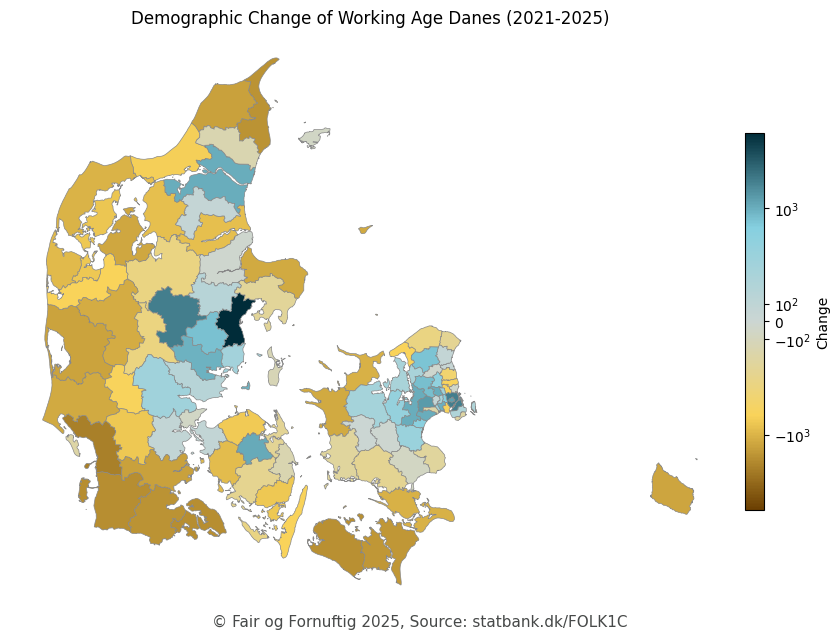

In [3]:
df = pd.read_csv("./raw/change_danish.csv", encoding="utf-8")

merged = gdf.merge(df[["Kommune", "Change"]], left_on="label_dk", right_on="Kommune", how="left")

# --- SymLogNorm: log-like scale with linear zone around 0  ---
vmin = np.nanmin(merged["Change"])
vmax = np.nanmax(merged["Change"])
bound = max(abs(vmin if vmin is not None else 0.0), abs(vmax if vmax is not None else 0.0)) or 1.0
linthresh = 500   
norm = SymLogNorm(linthresh=linthresh, linscale=1, vmin=-bound, vmax=bound)

cmap = build_colormap()

# Plot
fig, ax = plt.subplots(figsize=(8.5, 10))
merged.plot(column="Change", cmap=cmap, norm=norm, linewidth=0.5, edgecolor="#888888", ax=ax, missing_kwds={
        "color": "#f0f0f0", "hatch": "///", "label": "No data"
    })
ax.set_axis_off()
    
plt.title("Demographic Change of Working Age Danes (2021-2025)")
fig.text(0.5, 0.2, "© Fair og Fornuftig 2025, Source: statbank.dk/FOLK1C",
         ha='center', va='center', fontsize=11, color='#191C1B', alpha=0.8)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, fraction=0.025, pad=0.02)
cbar.set_label("Change")

plt.tight_layout()
fig.savefig("./images/dk_change_map.png", dpi=220)

plt.show

### Foreign National Demographic Change

Here we see that but for a couple of kommuner, the net migration of working age foreign nationals has been positive everywhere.


<function matplotlib.pyplot.show(close=None, block=None)>

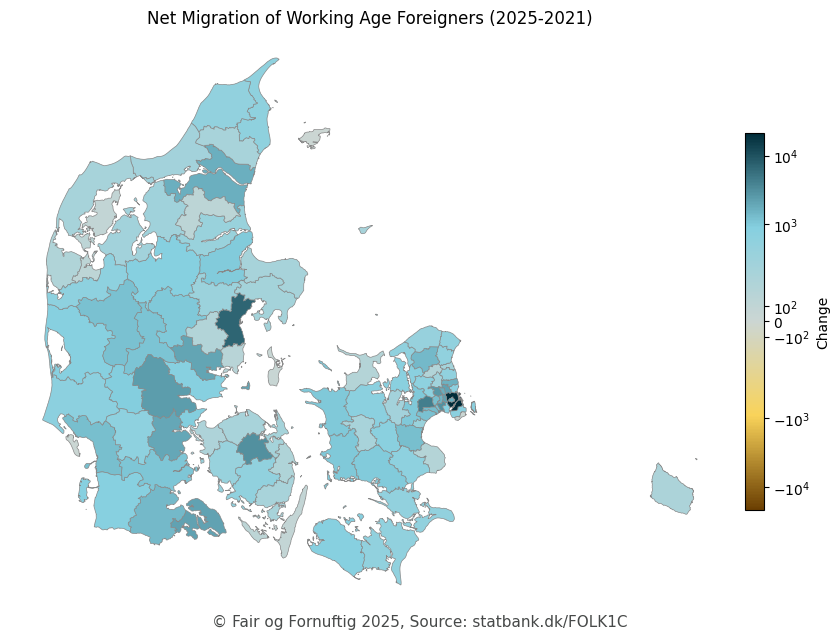

In [4]:
df = pd.read_csv("./raw/foreign_national_change.csv", encoding="utf-8")

merged = gdf.merge(df[["Kommune", "Change"]], left_on="label_dk", right_on="Kommune", how="left")

# --- SymLogNorm: log-like scale with linear zone around 0  ---
vmin = np.nanmin(merged["Change"])
vmax = np.nanmax(merged["Change"])
bound = max(abs(vmin if vmin is not None else 0.0), abs(vmax if vmax is not None else 0.0)) or 1.0
linthresh = 500   
norm = SymLogNorm(linthresh=linthresh, linscale=1, vmin=-bound, vmax=bound)

cmap = build_colormap()

# Plot
fig, ax = plt.subplots(figsize=(8.5, 10))
merged.plot(column="Change", cmap=cmap, norm=norm, linewidth=0.5, edgecolor="#888888", ax=ax, missing_kwds={
        "color": "#f0f0f0", "hatch": "///", "label": "No data"
    })
ax.set_axis_off()
    

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, fraction=0.025, pad=0.02)
cbar.set_label("Change")
plt.title("Net Migration of Working Age Foreigners (2025-2021)")
fig.text(0.5, 0.2, "© Fair og Fornuftig 2025, Source: statbank.dk/FOLK1C",
         ha='center', va='center', fontsize=11, color='#191C1B', alpha=0.8)

plt.tight_layout()
fig.savefig("./images/foreign_change_map.png", dpi=220)

plt.show

In [5]:
df_national= pd.read_csv("./raw/change_since_pandemic_clean.csv", encoding="utf-8")
df_danish = pd.read_csv("./raw/change_danish.csv", encoding="utf-8")
df_foreign = pd.read_csv("./raw/foreign_national_change.csv", encoding="utf-8")

# Rename 'Change' columns before merging
df_national = df_national.rename(columns={"Change": "Total"})
df_danish = df_danish.rename(columns={"Change": "Danish"})
df_foreign = df_foreign.rename(columns={"Change": "Foreign National"})

# Merge all on 'Kommune'
df_all = (
    df_national[["Kommune", "Total"]]
    .merge(df_danish[["Kommune", "Danish"]], on="Kommune", how="left")
    .merge(df_foreign[["Kommune", "Foreign National"]], on="Kommune", how="left")
)



### Data Exploration

Classifying municipal growth patterns into different categorical groupings

In [6]:
SMALL = 100  # treat anything between -SMALL and +SMALL as ~stable/rounding noise
eps = 1e-9

# clean types just in case
df_all["Kommune"] = df_all["Kommune"].astype(str).str.strip()
for c in ["Total","Danish","Foreign National"]:
    df_all[c] = pd.to_numeric(df_all[c], errors="coerce").fillna(0)

# helper metrics
df_all["replacement_ratio"] = np.where(
    df_all["Danish"] < -SMALL,
    df_all["Foreign National"] / (-df_all["Danish"] + eps),
    np.nan
)
df_all["foreign_share_of_growth"] = np.where(
    df_all["Total"] > SMALL,
    df_all["Foreign National"] / (df_all["Total"] + eps),
    np.nan
)

def classify(row):
    T = row["Total"]
    D = row["Danish"]
    F = row["Foreign National"]

    # near-zero helpers
    T_pos  = T >  SMALL
    T_neg  = T < -SMALL
    T_flat = not T_pos and not T_neg

    D_pos, D_neg = D > SMALL, D < -SMALL
    F_pos, F_neg = F > SMALL, F < -SMALL

    # priority order of mutually exclusive categories
    if T_pos and D_neg and F_pos:
        # growth but Danes down -> foreigners are the driver
        return "Growth driven by foreigners"
    if T_flat and D_neg and F_pos:
        # total ~flat but foreigners offset Danish decline
        return "Stable because of foreigners"
    if T_pos and D_pos and F_pos:
        return "Dual growth (Danes + Foreigners)"
    if T_pos and D_pos and not F_pos:
        return "Growth driven by Danes"
    if T_neg and D_neg and not F_pos:
        return "Working age population decline"
    if T_neg and D_neg and F_pos:
        return "Decline despite foreign inflow"
    if T_flat and ((D_pos and F_neg) or (D_neg and F_pos)):
        return "Stable: offsetting churn"
    return "Small change"

df_all["Typology"] = df_all.apply(classify, axis=1)



In [7]:
df_all[df_all["Typology"] == "Growth driven by foreigners"].sort_values("Foreign National", ascending=False).head(10)

df_all["Foreign_share_of_total_growth"] = (
    df_all["Foreign National"] / (df_all["Total"].replace(0, np.nan))
)


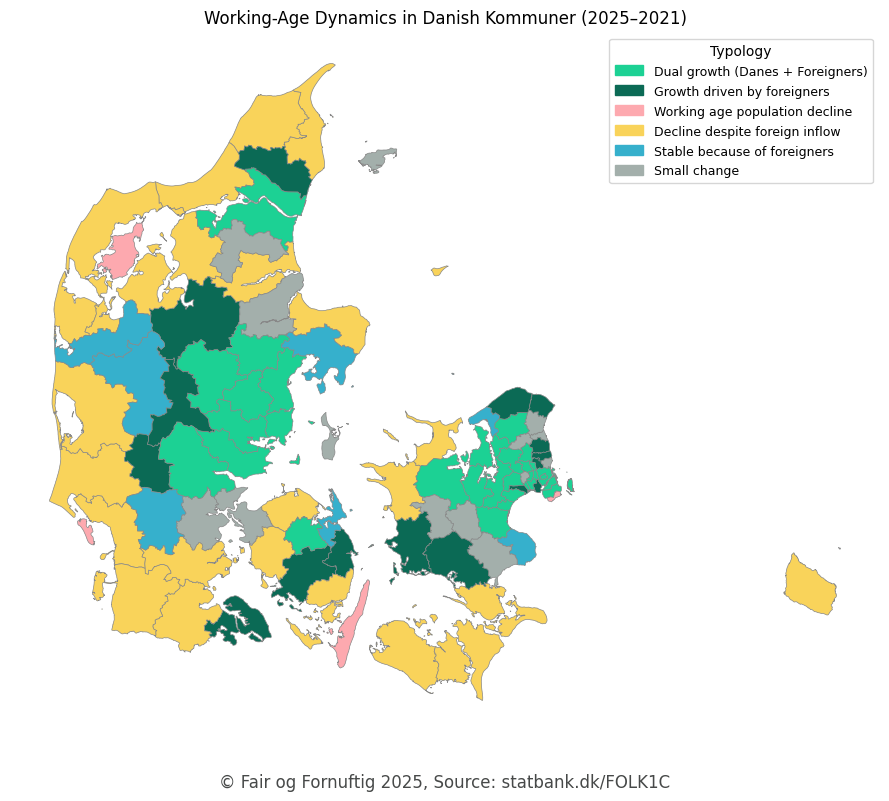

In [8]:


# Clean merge keys
df_plot = df_all.copy()
df_plot["Kommune"] = df_plot["Kommune"].astype(str).str.strip()
gdf["label_dk"] = gdf["label_dk"].astype(str).str.strip()

merged = gdf.merge(df_plot, left_on="label_dk", right_on="Kommune", how="left")

# Color-blind friendly palette
PALETTE = {
    "Growth driven by foreigners":        "#0B6A55",  # blue
    "Stable because of foreigners":   "#36B0CC",  # light blue
    "Dual growth (Danes + Foreigners)":   "#1CD194",  # green
    "Growth driven by Danes":             "#B58A21",  # orange
    "Working age population decline":     "#FDA9AF",  # light pink
    "Decline despite foreign inflow":     "#F9D35A",  # yellow
    "Small change":                "#A3AFAB",  # grey
}

merged["cat_color"] = merged["Typology"].map(PALETTE)

fig, ax = plt.subplots(figsize=(9, 10))
merged.plot(color=merged["cat_color"], linewidth=0.5, edgecolor="#888888", ax=ax,
            missing_kwds={"color": "#f0f0f0", "hatch": "///", "label": "No data"})
ax.set_axis_off()
plt.title("Working-Age Dynamics in Danish Kommuner (2025–2021)")
fig.text(0.5, 0.1, "© Fair og Fornuftig 2025, Source: statbank.dk/FOLK1C",
         ha='center', va='center', fontsize=12, color='#191C1B', alpha=0.8)

# Build legend in fixed, readable order
legend_order = [
    "Dual growth (Danes + Foreigners)",
    "Growth driven by foreigners",
    "Working age population decline",
    "Decline despite foreign inflow",
    "Stable because of foreigners",
    "Small change",
]
patches = [mpatches.Patch(color=PALETTE[k], label=k) for k in legend_order]
leg = ax.legend(handles=patches, title="Typology", loc="upper right", frameon=True)
for t in leg.get_texts():
    t.set_fontsize(9)

plt.tight_layout()
fig.savefig("./images/typology_map.png", dpi=220)
plt.show()


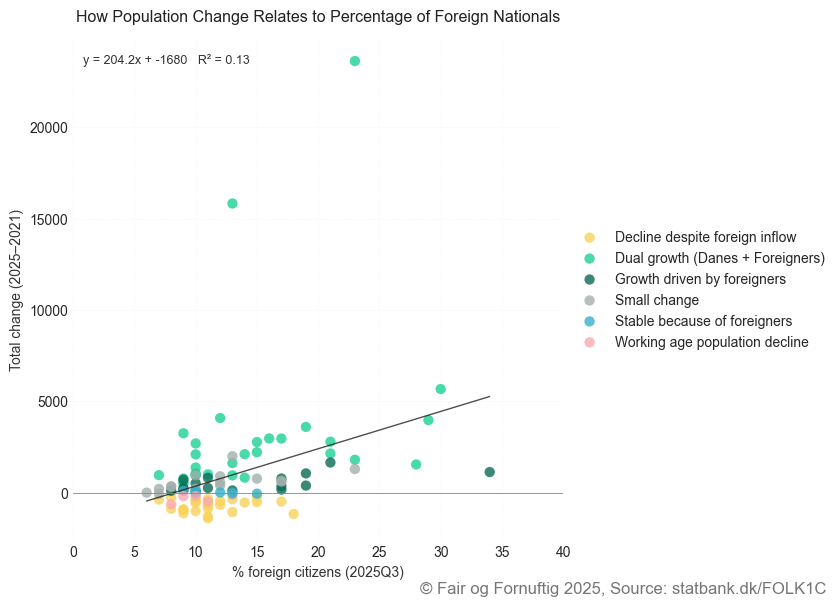

In [9]:

# === SETTINGS ===
INPUT_CSV = "./raw/percentage of foreigners.csv"
Y_VAR = "Total"  # "Total", "Danish", or "Foreign National"
OUTPUT_PNG = f"./images/scatter_{Y_VAR.lower()}_vs_foreign_share_typology_minimal.png"
TITLE = f"How Population Change Relates to Percentage of Foreign Nationals"

# Color-blind friendly palette 
TYPOLOGY_COLOURS = {
  
    "Growth driven by foreigners":        "#0B6A55",  # blue
    "Stable because of foreigners":   "#36B0CC",  # light blue
    "Dual growth (Danes + Foreigners)":   "#1CD194",  # green
    "Growth driven by Danes":             "#B58A21",  # orange
    "Working age population decline":     "#FDA9AF",  # light pink
    "Decline despite foreign inflow":     "#F9D35A",  # yellow
    "Small change":                "#A3AFAB",  # grey
}


# === 1) Load % foreign CSV ===
foreign = pd.read_csv(INPUT_CSV, encoding="utf-8")

if "Foreign citizen" in foreign.columns:
    foreign["pct_foreign_2025Q3"] = pd.to_numeric(foreign["Foreign citizen"], errors="coerce")
else:
    raise ValueError("CSV must contain a 'Foreign citizen' column.")

foreign = foreign.rename(columns={"region": "Kommune"})

# === 2) Merge with df_all ===
if "df_all" not in globals():
    raise RuntimeError("df_all must exist (Kommune, Total, Danish, Foreign National, Typology).")

merged = df_all.merge(foreign[["Kommune", "pct_foreign_2025Q3"]], on="Kommune", how="left")

for c in ["Total", "Danish", "Foreign National"]:
    merged[c] = pd.to_numeric(merged[c], errors="coerce")

# === 3) Plot ===
plt.style.use("seaborn-v0_8-whitegrid")

fig, ax = plt.subplots(figsize=(8.5, 6))

# Scatter by typology
for typ, group in merged.groupby("Typology"):
    ax.scatter(
        group["pct_foreign_2025Q3"],
        group[Y_VAR],
        s=55,
        color=TYPOLOGY_COLOURS.get(typ, "#999999"),
        label=typ,
        alpha=0.8,
        edgecolor="none",
    )

# Trend line
x = merged["pct_foreign_2025Q3"]
y = merged[Y_VAR]
mask = x.notna() & y.notna()
coef = np.polyfit(x[mask], y[mask], 1)
poly = np.poly1d(coef)
x_line = np.linspace(x.min(), x.max(), 200)
ax.plot(x_line, poly(x_line), linestyle="-", color="#222222", lw=1.0, alpha=0.8)

# Equation + R² (discreet, top left)
r2 = 1 - np.sum((y[mask] - poly(x[mask]))**2) / np.sum((y[mask] - y[mask].mean())**2)
ax.text(
    0.02, 0.97, f"y = {coef[0]:.1f}x + {coef[1]:.0f}   R² = {r2:.2f}",
    transform=ax.transAxes, ha="left", va="top", fontsize=9, color="#333333"
)

# Minimalist axes
ax.axhline(0, color="#888888", lw=0.6)
ax.set_xlabel("% foreign citizens (2025Q3)", fontsize=10, color="#333333")
ax.set_ylabel(f"{Y_VAR} change (2025–2021)", fontsize=10, color="#333333")
ax.set_title(TITLE, fontsize=11.5, color="#222222", pad=12)
ax.grid(True, linestyle=":", lw=0.5, alpha=0.3)
ax.set_xlim(0, 40)

# Legend — small and off to the side
ax.legend(
     fontsize=10,
    loc="center left", bbox_to_anchor=(1.0, 0.5), frameon=False
)

# Clean up borders
for spine in ax.spines.values():
    spine.set_visible(False)
fig.text(0.5, 0.01, "© Fair og Fornuftig 2025, Source: statbank.dk/FOLK1C",
         ha='left', va='center', fontsize=12, color='#191C1B', alpha=0.6)

fig.tight_layout()
plt.savefig(OUTPUT_PNG, dpi=220, bbox_inches="tight")
plt.show()



In [10]:
# === Kommuner where growth is driven by foreigners ===
growth_foreign = (
    merged.loc[merged["Typology"] == "Growth driven by foreigners",
               ["Kommune", "Total", "Danish", "Foreign National", "pct_foreign_2025Q3"]]
    .sort_values("pct_foreign_2025Q3", ascending=False)
    .reset_index(drop=True)
)

# Display
growth_foreign.head(90)


,Kommune,Total,Danish,Foreign National,pct_foreign_2025Q3
0,Ishøj,1129,-185,1314,34
1,Gladsaxe,1651,-528,2179,21
2,Lyngby-Taarbæk,1056,-547,1603,19
3,Billund,389,-555,944,19
4,Sønderborg,169,-2026,2195,17
5,Ikast-Brande,775,-359,1134,17
6,Hvidovre,357,-528,885,17
7,Rudersdal,123,-433,556,13
8,Helsingør,257,-276,533,11
9,Slagelse,817,-233,1050,11


In [11]:
# === Kommuner where growth is held steady by foreigners ===
steady_foreign = (
    merged.loc[merged["Typology"] == "Stable because of foreigners",
               ["Kommune", "Total", "Danish", "Foreign National", "pct_foreign_2025Q3"]]
    .sort_values("pct_foreign_2025Q3", ascending=False)
    .reset_index(drop=True)
)


steady_foreign.head(90)

,Kommune,Total,Danish,Foreign National,pct_foreign_2025Q3
0,Vejen,-51,-693,642,15
1,Halsnæs,-13,-576,563,13
2,Herning,12,-1165,1177,12
3,Kerteminde,70,-268,338,10
4,Stevns,-21,-232,211,10
5,Holstebro,55,-573,628,10
6,Syddjurs,97,-256,353,9


In [12]:
# === Kommuner where growth is through foreigners and Danes ===
growth_both = (
    merged.loc[merged["Typology"] == "Dual growth (Danes + Foreigners)",
               ["Kommune", "Total", "Danish", "Foreign National", "pct_foreign_2025Q3"]]
    .sort_values("pct_foreign_2025Q3", ascending=False)
    .reset_index(drop=True)
)

# Display
growth_both.head(90)


,Kommune,Total,Danish,Foreign National,pct_foreign_2025Q3
0,Høje-Taastrup,5672,1368,4304,30
1,Brøndby,3972,992,2980,29
2,Vallensbæk,1545,342,1203,28
3,Copenhagen,23626,2202,21424,23
4,Glostrup,1804,277,1527,23
5,Herlev,2146,347,1799,21
6,Rødovre,2790,561,2229,21
7,Ballerup,3600,1014,2586,19
8,Frederiksberg,2963,1289,1674,17
9,Horsens,2970,929,2041,16


In [13]:
# === Foreigners arriving but kommune workforce still contracting ===
contracting_foreign = (
    merged.loc[merged["Typology"] == "Decline despite foreign inflow",
               ["Kommune", "Total", "Danish", "Foreign National", "pct_foreign_2025Q3"]]
    .sort_values("pct_foreign_2025Q3", ascending=False)
    .reset_index(drop=True)
)

# Display
contracting_foreign.head(90)

,Kommune,Total,Danish,Foreign National,pct_foreign_2025Q3
0,Tønder,-1167,-2032,865,18
1,Aabenraa,-484,-1844,1360,17
2,Ærø,-207,-341,134,15
3,Ringkøbing-Skjern,-515,-1376,861,15
4,Varde,-542,-1233,691,14
5,Haderslev,-356,-1450,1094,13
6,Lolland,-1061,-1906,845,13
7,Lemvig,-662,-906,244,12
8,Vesthimmerland,-456,-846,390,12
9,Nordfyns,-345,-659,314,11


In [14]:
# Typology List of Kommuner
# === Typology List of Kommuner ===
typology_pct = (
    merged.loc[
        (merged["Typology"] != "Dual growth (Danes + Foreigners)") &
        (merged["pct_foreign_2025Q3"] >= 10),
        ["Kommune", "Typology", "pct_foreign_2025Q3"]
    ]
    .sort_values("pct_foreign_2025Q3", ascending=False)
    .reset_index(drop=True)
)

typology_pct.head(90)



,Kommune,Typology,pct_foreign_2025Q3
0,Ishøj,Growth driven by foreigners,34
1,Albertslund,Small change,23
2,Gladsaxe,Growth driven by foreigners,21
3,Lyngby-Taarbæk,Growth driven by foreigners,19
4,Billund,Growth driven by foreigners,19
5,Tønder,Decline despite foreign inflow,18
6,Gentofte,Small change,17
7,Aabenraa,Decline despite foreign inflow,17
8,Sønderborg,Growth driven by foreigners,17
9,Hvidovre,Growth driven by foreigners,17


### Summary
Some kommuner are now so dependent on international residents that it no longer makes sense to plan without their input.

In places where the working-age population is stable or growing, it’s often internationals holding that line:  paying tax, filling essential roles and keeping services viable. The demographic balance has already shifted; the local governance hasn’t caught up.

The conversation needs to move on from 'attracting international workforce' and onto 'how do we make these valued members of our community thrive, do they have special challenges to meet?'